In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load data
train = pd.read_csv('train_convert.csv')
test = pd.read_csv('test_convert.csv')

In [4]:
#Take sample feature
sample_df_train = train[['Id','LotArea','LotFrontage','Alley','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','OpenPorchSF','EnclosedPorch','GarageArea','SalePrice']]
print(sample_df_train.head())
#Take sample feature
sample_df_test = test[['Id','LotArea','LotFrontage','Alley','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','OpenPorchSF','EnclosedPorch','GarageArea']]
print(sample_df_test.head())

   Id  LotArea  LotFrontage  Alley  OverallQual  YearBuilt  YearRemodAdd  \
0   1     8450         65.0      0            7       2003          2003   
1   2     9600         80.0      0            6       1976          1976   
2   3    11250         68.0      0            7       2001          2002   
3   4     9550         60.0      0            7       1915          1970   
4   5    14260         84.0      0            8       2000          2000   

   MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0       196.0         706          856       856       854       1710   
1         0.0         978         1262      1262         0       1262   
2       162.0         486          920       920       866       1786   
3         0.0         216          756       961       756       1717   
4       350.0         655         1145      1145      1053       2198   

   TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  GarageArea  SalePrice  
0             8        

In [5]:
#clean NA data
data_train = sample_df_train.dropna()

In [6]:
sum(data_train.isnull().sum() != 0)

0

In [7]:
#Building a Linear Model
y = np.log(data_train.SalePrice)
X = data_train.drop(['SalePrice', 'Id'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [9]:
#Begin Modelling
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [10]:
model = lr.fit(X_train, y_train)

In [11]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8497662700160444


In [12]:
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.025604542421718158


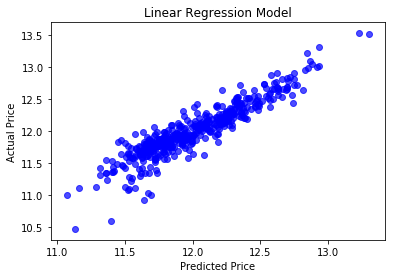

In [14]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

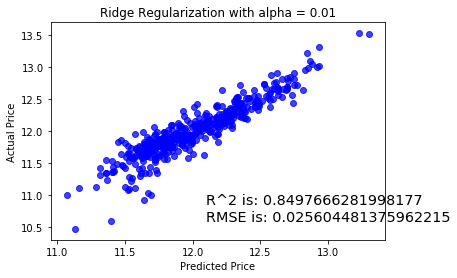

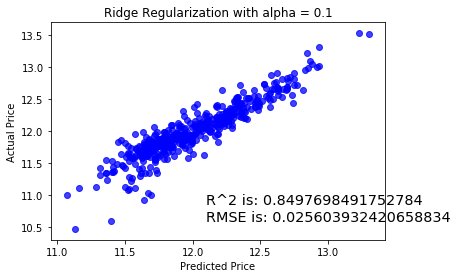

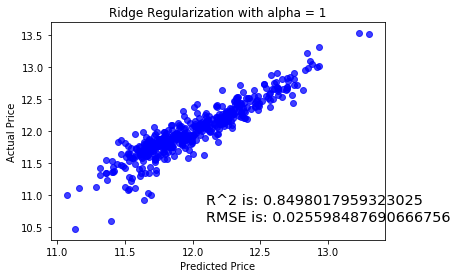

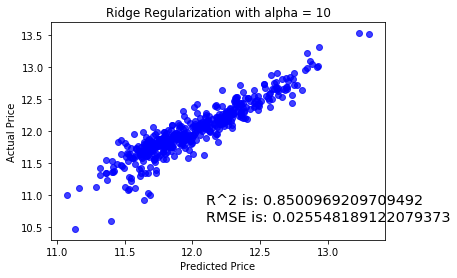

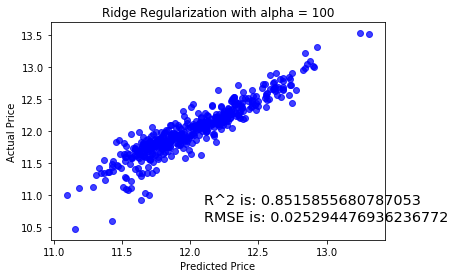

In [15]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [16]:
submission = pd.DataFrame()
submission['Id'] = sample_df_test.Id

In [17]:
feats = sample_df_test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [18]:
predictions = model.predict(feats)

In [19]:
final_predictions = np.exp(predictions)

In [20]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76823661 11.88422184 12.00924855 12.10512682 12.22601785] 

Final predictions are: 
 [129086.31987482 144961.26426413 164267.02008242 180796.40054282
 204029.08816215]


In [22]:
submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv('result_lr.csv', index=False)